In [223]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, AdaBoostRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston

## 1. Problem Statement

In [ ]:
Objective: Prediction of target price based on several independent variables
Independent variables : 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'
Dependent variable : 'Price'

## 2. Data Gathering

In [224]:
boston=load_boston()
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [225]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['PRICE']=boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [145]:
df.shape

(506, 14)

In [31]:
print (df.dtypes['CRIM'] == 'int')

False


In [16]:
type(x)

pandas.core.series.Series

## 3. Exploratory Data Analysis

In [71]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [146]:
df['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
df.isnull().mean()*100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
PRICE      0.0
dtype: float64

In [ ]:
#No null value observed

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#Checking for Outliers
Desc=df.describe().T
Diff= Desc['max']-Desc['mean']
Diff

CRIM        85.362676
ZN          88.636364
INDUS       16.603221
CHAS         0.930830
NOX          0.316305
RM           2.495366
AGE         31.425099
DIS          8.331457
RAD         14.450593
TAX        302.762846
PTRATIO      3.544466
B           40.225968
LSTAT       25.316937
PRICE       27.467194
dtype: float64

### Unerstanding and conclusion from EDA 

In [ ]:
1. 506 columns and 14 features in dataset including target feature
2. No object dtype in dataset
3. No null values in dataset
4. Outliers seem to be there in data(need more analysis and treatment)

# 4. Feature Engineering 

In [ ]:
1. No FE on dtypes conversion as concluded during EDA
2. No FE on null values as concluded during EDA
3. FE required on outliers

<AxesSubplot:>

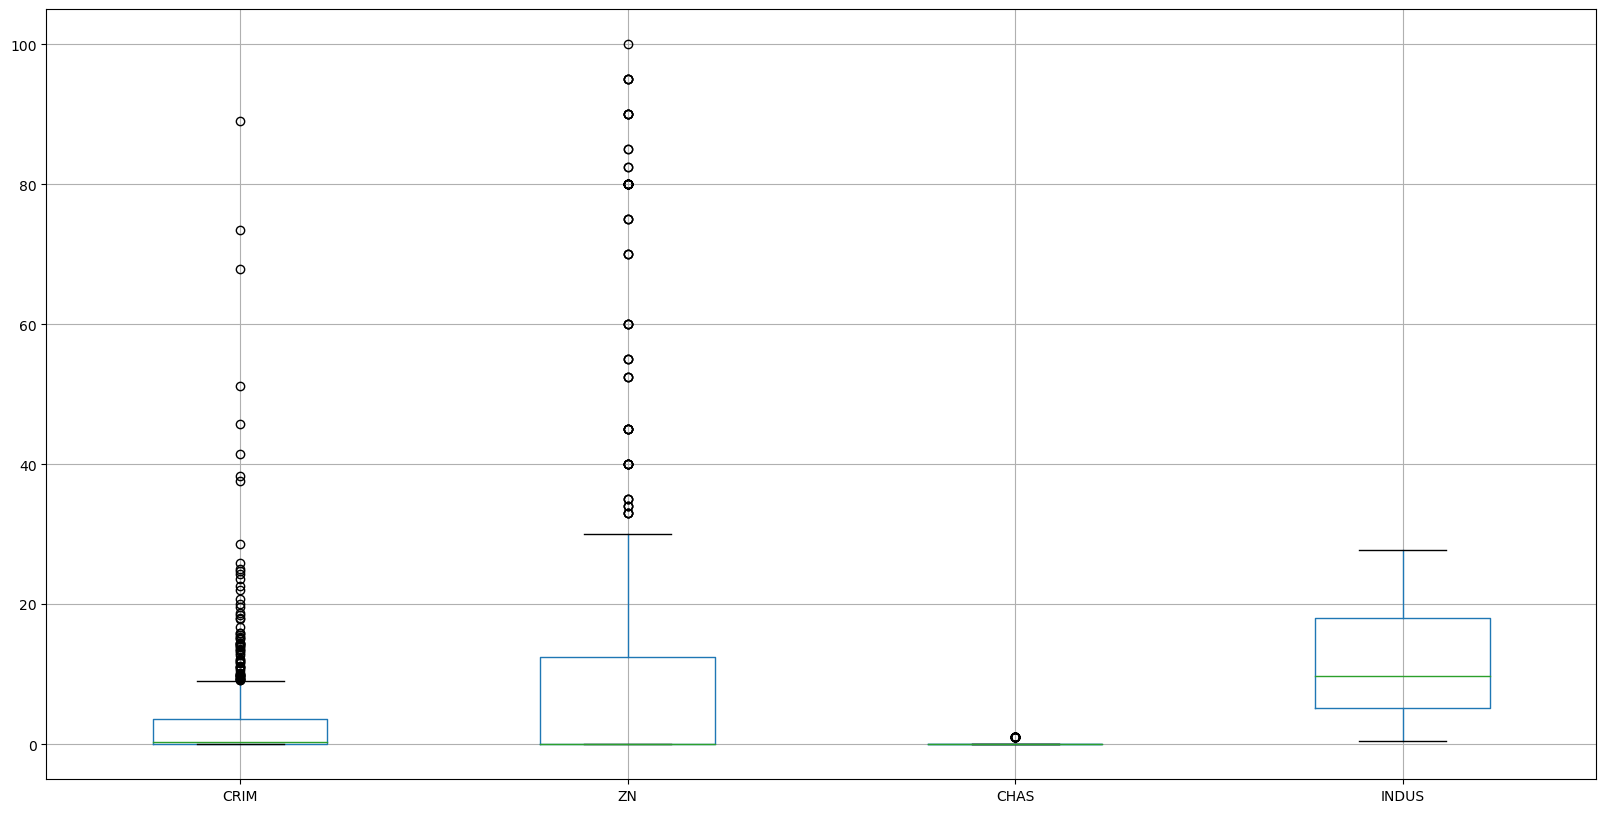

In [226]:
plt.figure(figsize=(20,10))
df[['CRIM','ZN','CHAS','INDUS']].boxplot()

<AxesSubplot:>

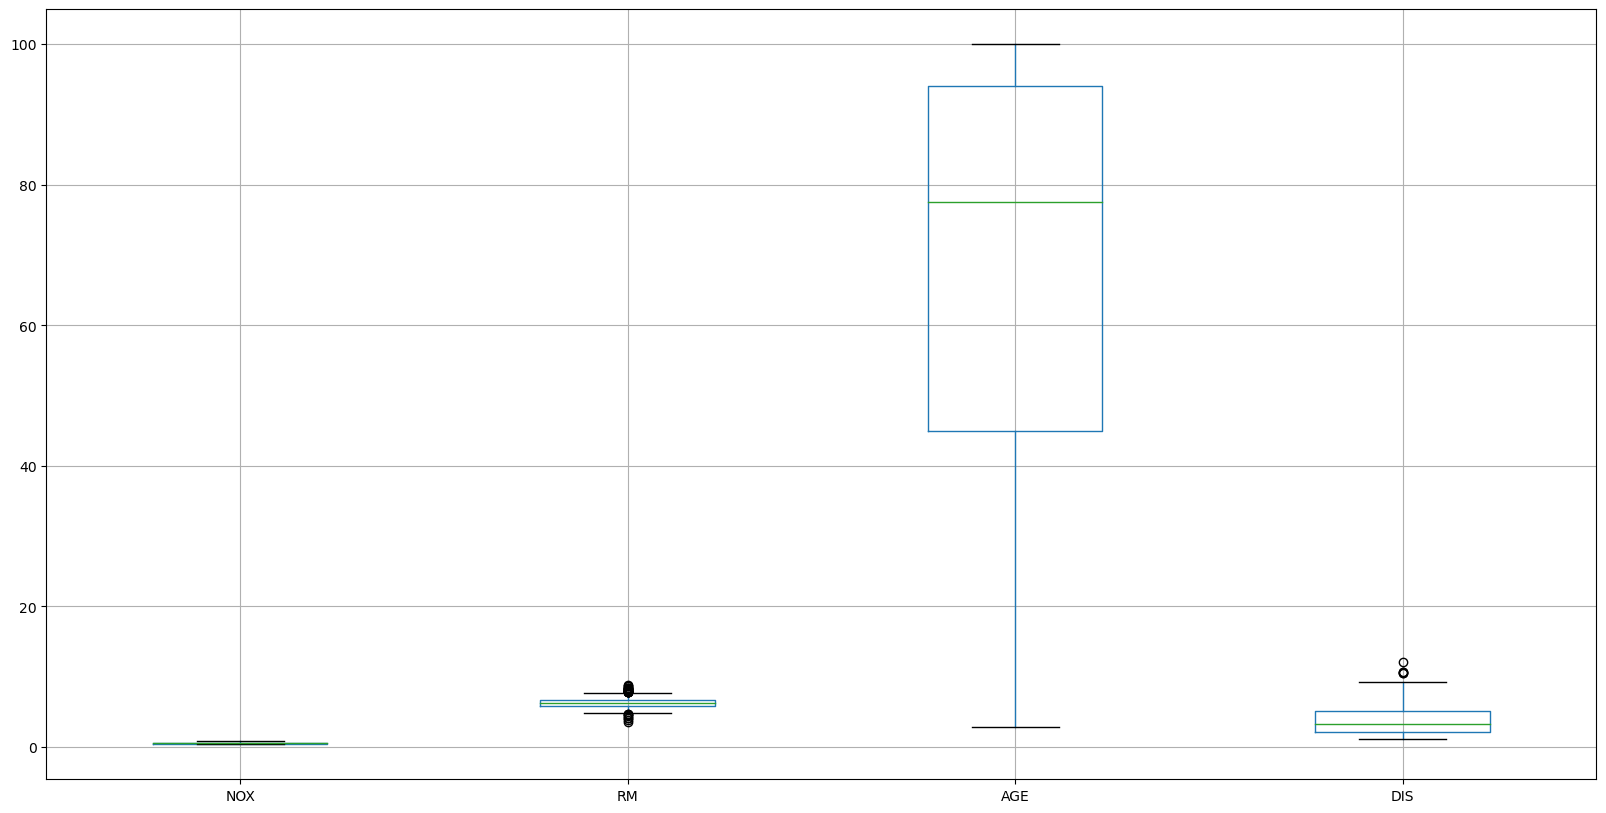

In [148]:
plt.figure(figsize=(20,10))
df[['NOX','RM','AGE','DIS']].boxplot()

<AxesSubplot:>

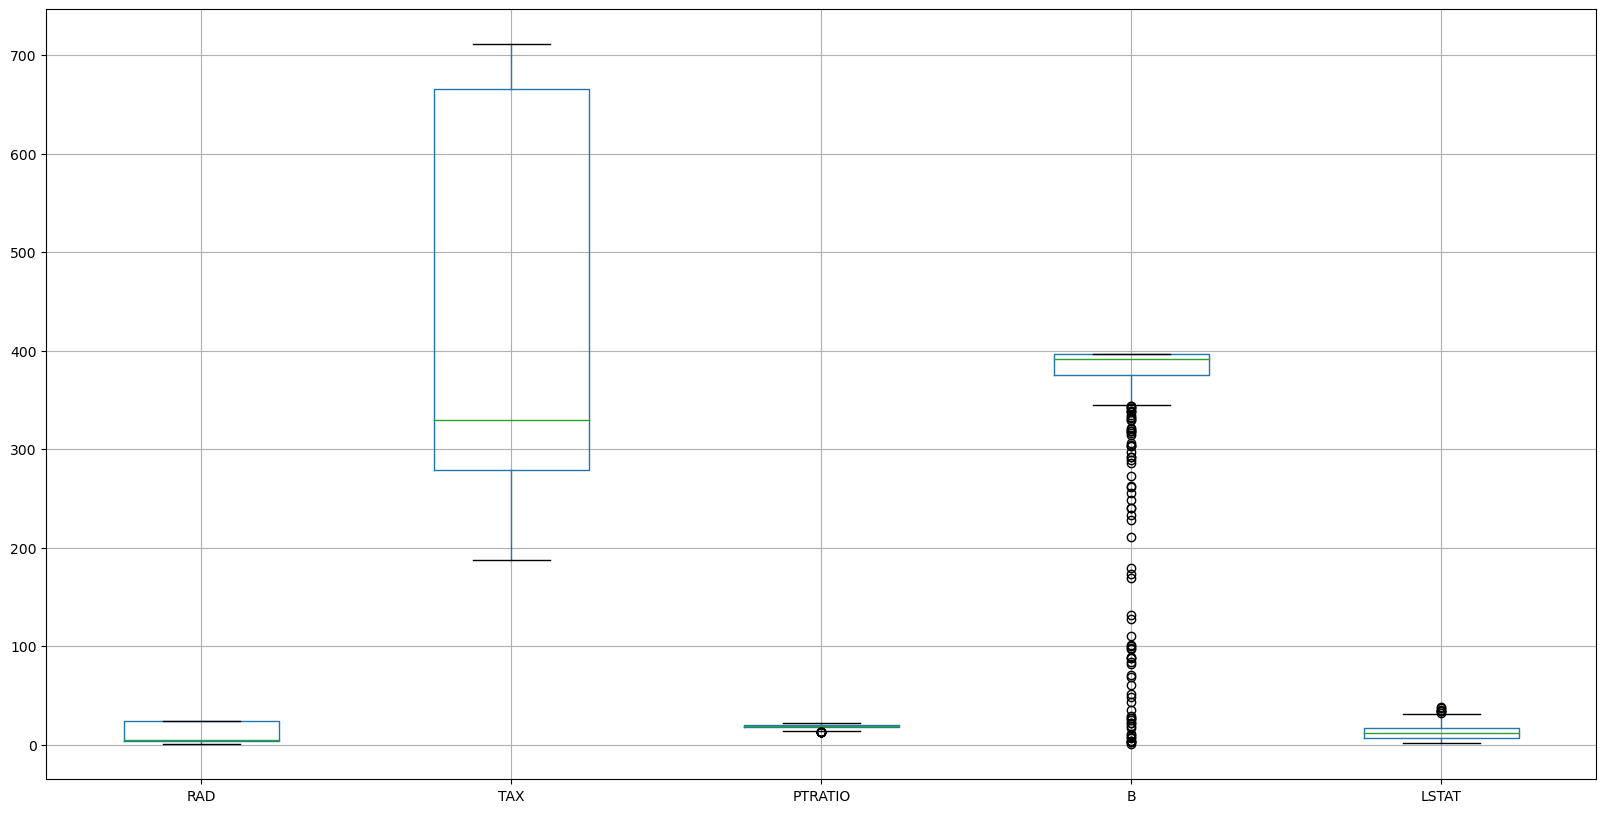

In [149]:
plt.figure(figsize=(20,10))
df[['RAD','TAX','PTRATIO','B','LSTAT']].boxplot()

In [ ]:
Outliers present in 8 features-
CRIM , ZN , CHAS
RM, DIS
PTRATIO, B , LSTAT

#### 1. CRIM

<AxesSubplot:xlabel='CRIM'>

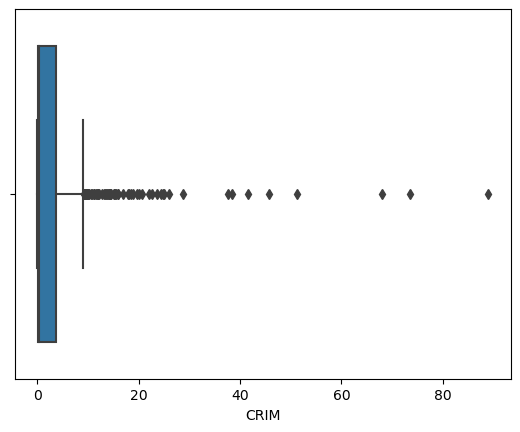

In [227]:
sns.boxplot(x=df['CRIM'])

<AxesSubplot:xlabel='CRIM', ylabel='Density'>

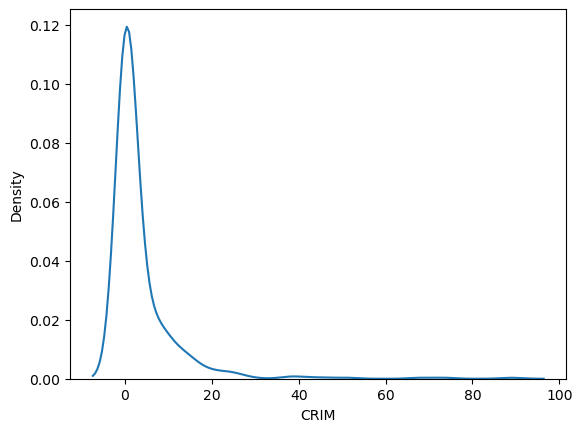

In [228]:
sns.kdeplot(df['CRIM'])
#Positively skewed data - IQR or log transfomation can be applied here

In [229]:
#IQR method
q1=df['CRIM'].quantile(0.25)
q2=df['CRIM'].quantile(0.5)
q3=df['CRIM'].quantile(0.75)
IQR=q3-q1

upper_tail=q3+(1.5*IQR)
lower_tail=q1-(1.5*IQR)
print('upper tail= ',upper_tail, '&','lower_tail= ',lower_tail)

upper tail=  9.06963875 & lower_tail=  -5.31051125


In [230]:
df.loc[(df['CRIM']>upper_tail),'CRIM']
#66 values are above upper_tail

367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: CRIM, Length: 66, dtype: float64

In [231]:
df.loc[(df['CRIM']<lower_tail),'CRIM']
#no outliers below lower_tail

Series([], Name: CRIM, dtype: float64)

In [233]:
df.loc[(df['CRIM']>upper_tail),'CRIM']=upper_tail
#outliers are imputed with upper tail
df.loc[(df['CRIM']>upper_tail),'CRIM']
#Outlers eliminated

Series([], Name: CRIM, dtype: float64)

<AxesSubplot:xlabel='CRIM'>

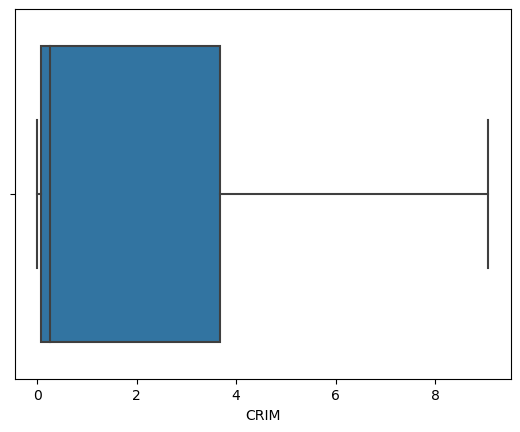

In [234]:
sns.boxplot(x=df['CRIM'])

### 2. ZN

<AxesSubplot:xlabel='ZN'>

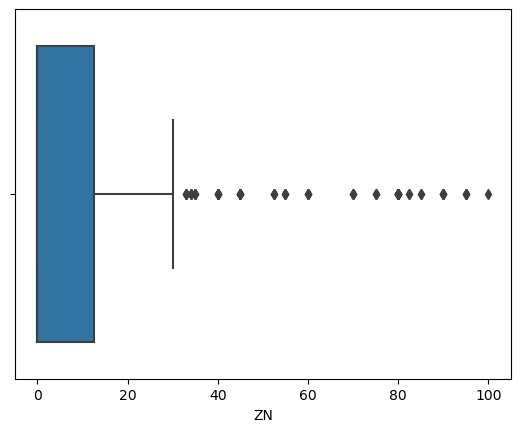

In [235]:
sns.boxplot(x=df['ZN'])

<AxesSubplot:xlabel='ZN', ylabel='Density'>

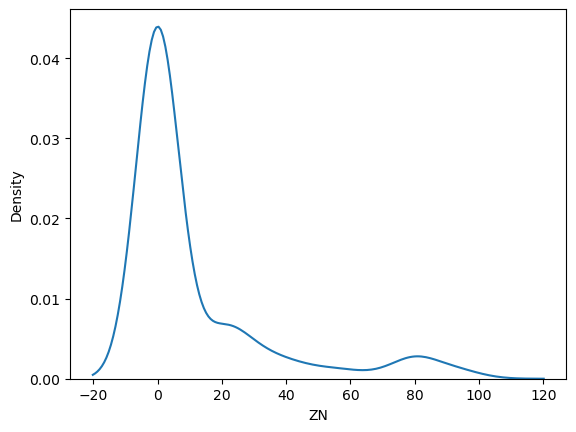

In [159]:
sns.kdeplot(df['ZN'])
#Positively skewed data - IQR or log transfomation can be applied here

In [236]:
#IQR method
q1=df['ZN'].quantile(0.25)
q2=df['ZN'].quantile(0.5)
q3=df['ZN'].quantile(0.75)
IQR=q3-q1

upper_tail=q3+(1.5*IQR)
lower_tail=q1-(1.5*IQR)
print('upper tail= ',upper_tail, '&','lower_tail= ',lower_tail)

upper tail=  31.25 & lower_tail=  -18.75


In [237]:
df.loc[(df['ZN'])>upper_tail,'ZN']
#68 values are above upper_tail

39     75.0
40     75.0
54     75.0
55     90.0
56     85.0
       ... 
351    60.0
352    60.0
353    90.0
354    80.0
355    80.0
Name: ZN, Length: 68, dtype: float64

In [238]:
df.loc[(df['ZN'])<lower_tail,'ZN']
#no outliers below lower_tail

Series([], Name: ZN, dtype: float64)

In [239]:
df.loc[(df['ZN']<=upper_tail)&df['ZN']>=lower_tail,'ZN']

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64

In [240]:
df.loc[(df['ZN']<=upper_tail)&df['ZN']>=lower_tail,'ZN'].mean()

11.363636363636363

In [241]:
df.loc[(df['ZN']<=upper_tail)&df['ZN']>=lower_tail,'ZN'].median()

0.0

In [242]:
df.loc[(df['ZN']>upper_tail),'ZN']=upper_tail
#outliers are imputed with upper tail
df.loc[(df['ZN']>upper_tail),'ZN']
#Outlers eliminated

Series([], Name: ZN, dtype: float64)

<AxesSubplot:xlabel='ZN'>

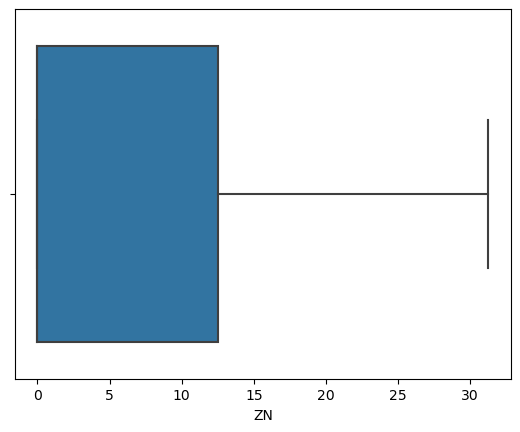

In [243]:
sns.boxplot(x=df['ZN'])

### 3.CHAS

In [244]:
df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

### 4.RM

<AxesSubplot:xlabel='RM'>

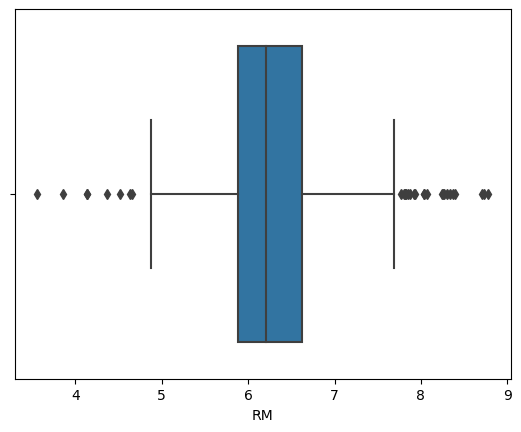

In [245]:
sns.boxplot(x=df['RM'])

<AxesSubplot:xlabel='RM', ylabel='Density'>

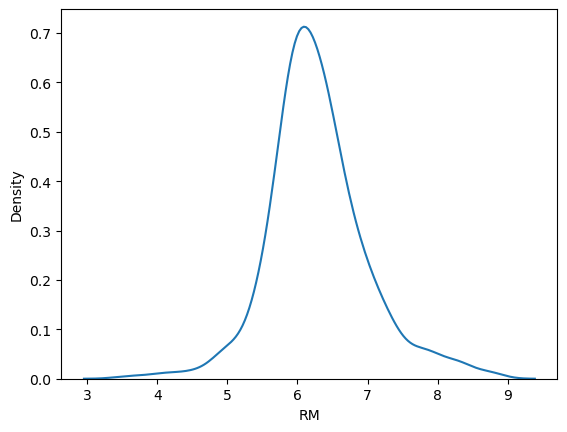

In [246]:
sns.kdeplot(df['RM'])

In [170]:
#Skewness
df['RM'].skew()
#Data is symmetric and normally distributed

0.40361213328874385

In [247]:
#Using IQR method
q1=df["RM"].quantile(0.25)
q2=df["RM"].quantile(0.5)
q3=df["RM"].quantile(0.75)
IQR=q3-q1

upper_tail= q3 + (1.5*IQR)
lower_tail= q1 - (1.5*IQR)
print("Lower_tail=",lower_tail," & ", "Upper_tail=",upper_tail)

Lower_tail= 4.778499999999999  &  Upper_tail= 7.730500000000001


In [248]:
df.loc[(df["RM"]>upper_tail),"RM"]

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
180    7.765
186    7.831
195    7.875
203    7.853
204    8.034
224    8.266
225    8.725
226    8.040
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
280    7.820
283    7.923
364    8.780
Name: RM, dtype: float64

In [249]:
df.loc[(df["RM"]<lower_tail),"RM"].shape
#8 values are below lower_tail

(8,)

In [250]:
df.loc[(df["RM"]>upper_tail),"RM"].shape
#22 values are above upper_tail

(22,)

In [251]:
df.loc[(df['RM']<upper_tail) & (df['RM']>lower_tail),'RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 476, dtype: float64

In [252]:
df_RM_Mean=df.loc[(df['RM']<upper_tail) & (df['RM']>lower_tail),'RM'].mean()
df_RM_Mean

6.233212184873957

In [253]:
df_RM_Median=df.loc[(df['RM']<upper_tail) & (df['RM']>lower_tail),'RM'].median()
df_RM_Median

6.1835

In [254]:
#There are outliers thus imputing with median
df.loc[(df['RM']>upper_tail),'RM']=upper_tail

In [255]:
df.loc[(df['RM']<lower_tail),'RM']=lower_tail

<AxesSubplot:xlabel='RM'>

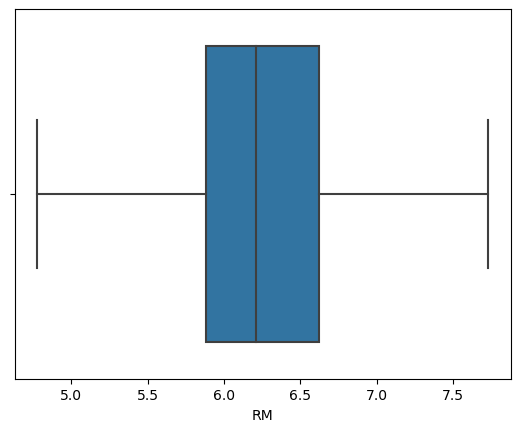

In [256]:
sns.boxplot(df['RM'])

### 5.DIS

<AxesSubplot:xlabel='DIS'>

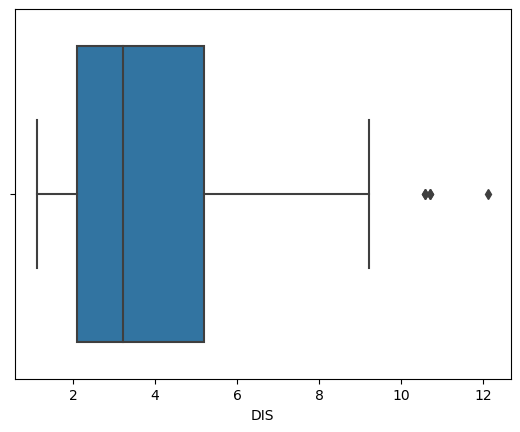

In [257]:
sns.boxplot(x=df['DIS'])

<AxesSubplot:xlabel='DIS', ylabel='Density'>

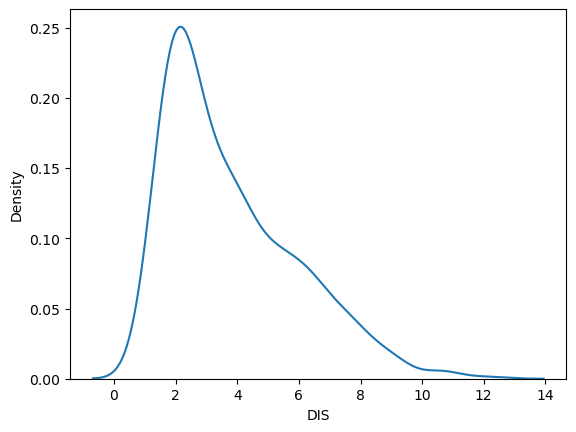

In [258]:
sns.kdeplot(df['DIS'])

In [259]:
df['DIS'].skew()
#Highly positive skewed

1.0117805793009007

In [260]:
#Using IQR method
q1=df["DIS"].quantile(0.25)
q2=df["DIS"].quantile(0.5)
q3=df["DIS"].quantile(0.75)
IQR=q3-q1

upper_tail= q3 + (1.5*IQR)
lower_tail= q1 - (1.5*IQR)
print("Lower_tail=",lower_tail," & ", "Upper_tail=",upper_tail)

Lower_tail= -2.5322000000000005  &  Upper_tail= 9.820800000000002


In [261]:
df.loc[(df["DIS"]>upper_tail),"DIS"].shape
#5 values are above upper_tail

(5,)

In [262]:
df.loc[(df["DIS"]<lower_tail),"DIS"]
# 0 outliers below lower_tail

Series([], Name: DIS, dtype: float64)

In [263]:
mean_DIS=df.loc[(df["DIS"]<=upper_tail),"DIS"].mean()
df.loc[(df["DIS"]>upper_tail),"DIS"]=mean_DIS

<AxesSubplot:xlabel='DIS'>

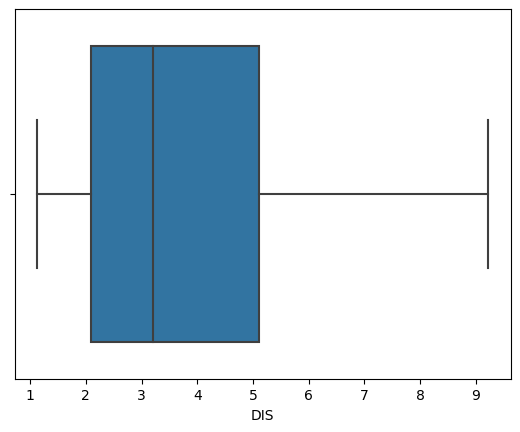

In [264]:
sns.boxplot(x=df['DIS'])

### 3.PTRATIO

<AxesSubplot:xlabel='PTRATIO'>

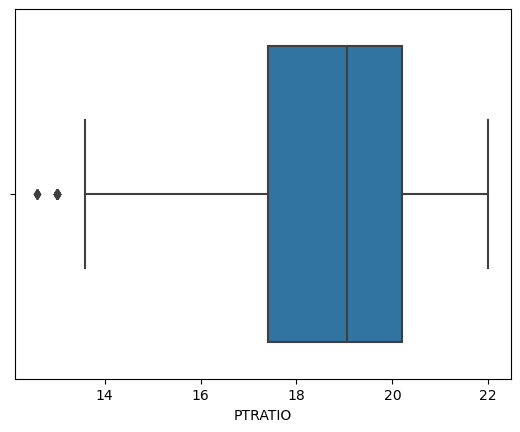

In [265]:
sns.boxplot(x=df['PTRATIO'])

<AxesSubplot:xlabel='PTRATIO', ylabel='Density'>

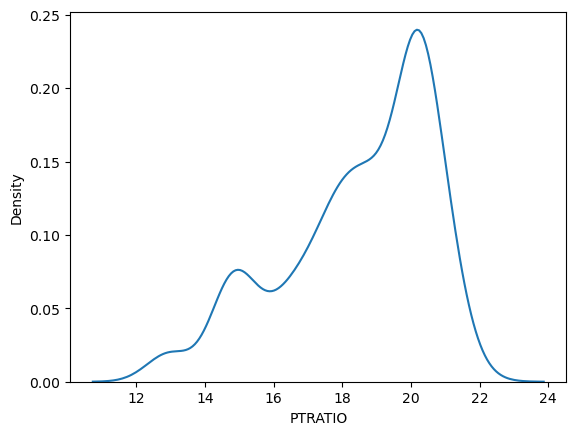

In [266]:
sns.kdeplot(df['PTRATIO'])
#negatively skewed data - Can use IQR

In [191]:
df['PTRATIO'].skew()

-0.8023249268537809

In [267]:
#Using IQR method
q1=df["PTRATIO"].quantile(0.25)
q2=df["PTRATIO"].quantile(0.5)
q3=df["PTRATIO"].quantile(0.75)
IQR=q3-q1

upper_tail= q3 + (1.5*IQR)
lower_tail= q1 - (1.5*IQR)
print("Lower_tail=",lower_tail," & ", "Upper_tail=",upper_tail)

Lower_tail= 13.199999999999998  &  Upper_tail= 24.4


In [268]:
df.loc[(df["PTRATIO"]<lower_tail),"PTRATIO"].shape
# 15 outliers below lower_tail

(15,)

In [269]:
median_PTRATIO=df.loc[(df["PTRATIO"]>=lower_tail),"PTRATIO"].median()
print('Median : ',median_PTRATIO)
mean_PTRATIO=df.loc[(df["PTRATIO"]>=lower_tail),"PTRATIO"].mean()
print('Mean : ',mean_PTRATIO)

Median :  19.1
Mean :  18.624643584521394


In [270]:
df.loc[(df['PTRATIO']<lower_tail),'PTRATIO']=median_PTRATIO

<AxesSubplot:xlabel='PTRATIO'>

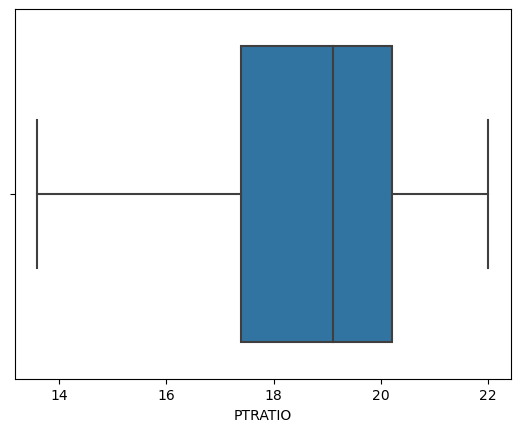

In [271]:
sns.boxplot(x=df['PTRATIO'])

### 7.B

<AxesSubplot:xlabel='B'>

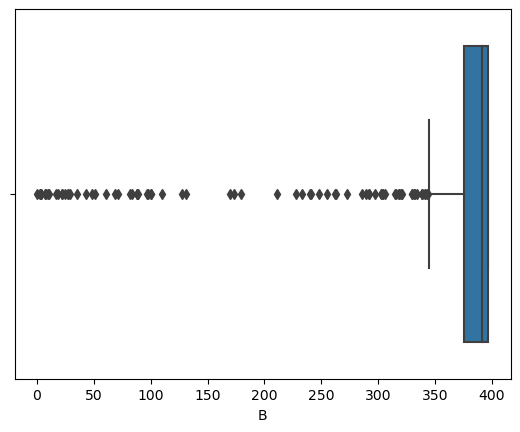

In [272]:
sns.boxplot(df['B'])

<AxesSubplot:xlabel='B', ylabel='Density'>

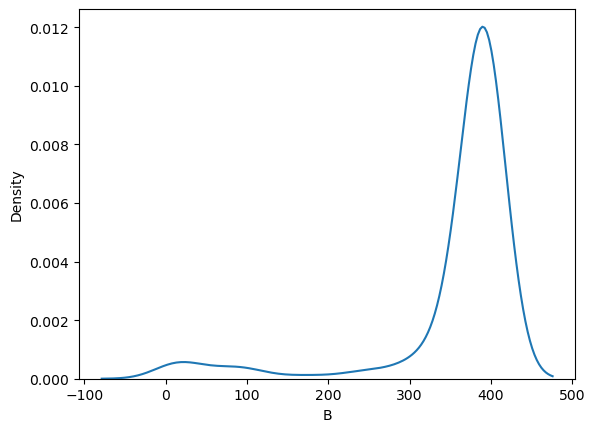

In [273]:
sns.kdeplot(df['B'])

In [274]:
df['B'].skew()
#Data is highly negative skewed

-2.8903737121414492

In [275]:
#Using IQR method
q1=df["B"].quantile(0.25)
q2=df["B"].quantile(0.5)
q3=df["B"].quantile(0.75)
IQR=q3-q1

upper_tail= q3 + (1.5*IQR)
lower_tail= q1 - (1.5*IQR)
print("Lower_tail=",lower_tail," & ", "Upper_tail=",upper_tail)

Lower_tail= 344.10624999999993  &  Upper_tail= 427.49625000000003


In [276]:
df.loc[(df["B"]<lower_tail),"B"].shape
# 77 outliers below lower_tail

(77,)

In [277]:
df.loc[(df['B']<lower_tail),'B']=lower_tail

<AxesSubplot:xlabel='B'>

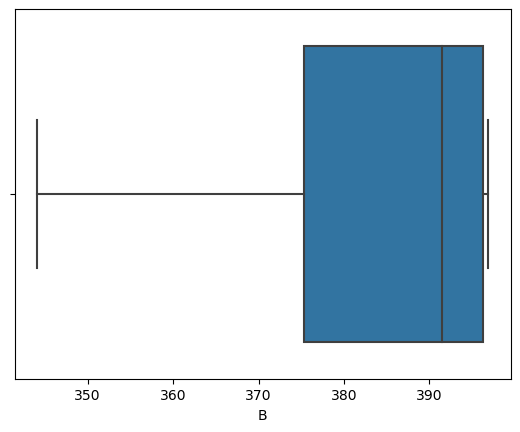

In [278]:
sns.boxplot(x=df['B'])

### 8.LSTAT

<AxesSubplot:xlabel='LSTAT'>

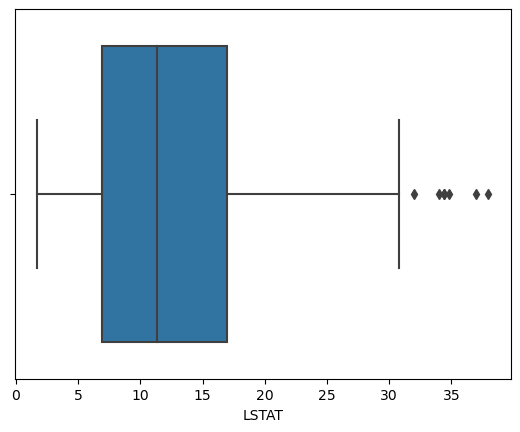

In [279]:
sns.boxplot(x=df['LSTAT'])

<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

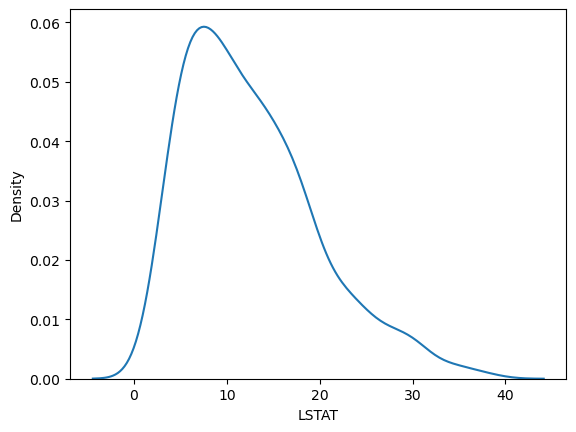

In [280]:
sns.kdeplot(df['LSTAT'])

In [281]:
df['LSTAT'].skew()
#positively skewed data - Can use IQR

0.9064600935915367

In [282]:
#Using IQR method
q1=df["LSTAT"].quantile(0.25)
q2=df["LSTAT"].quantile(0.5)
q3=df["LSTAT"].quantile(0.75)
IQR=q3-q1

upper_tail= q3 + (1.5*IQR)
lower_tail= q1 - (1.5*IQR)
print("Lower_tail=",lower_tail," & ", "Upper_tail=",upper_tail)

Lower_tail= -8.057500000000005  &  Upper_tail= 31.962500000000006


In [283]:
df.loc[(df["LSTAT"]>upper_tail),"LSTAT"].shape
# 7 outliers below upper_tail

(7,)

<AxesSubplot:xlabel='LSTAT'>

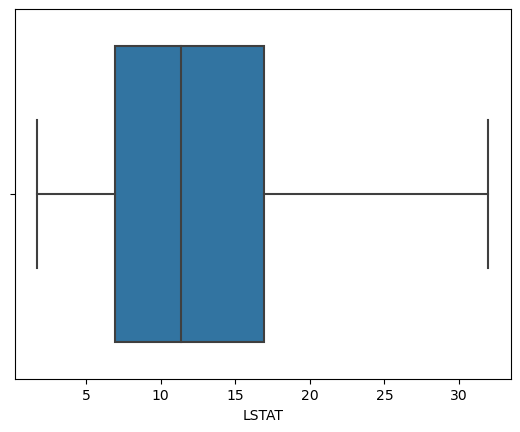

In [285]:
df.loc[(df["LSTAT"]>upper_tail),"LSTAT"]=upper_tail
sns.boxplot(df['LSTAT'])

In [ ]:
#All outliers now has been treated- "CHAS" feature has to be eliminated

## 5. Feature Selection

In [286]:
df.drop('CHAS',axis=1,inplace=True)

In [299]:
df.head(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

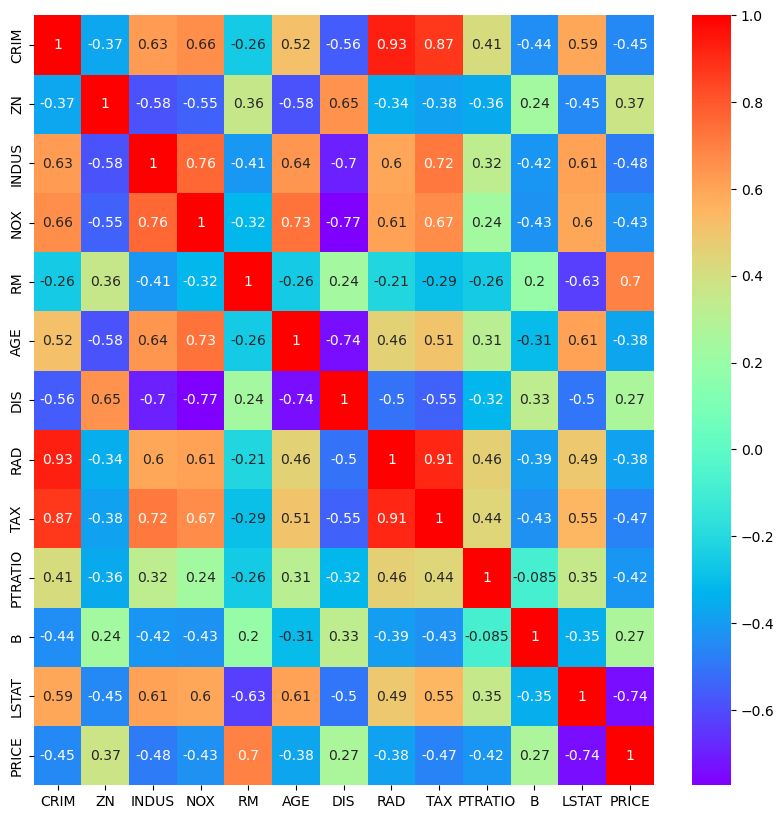

In [291]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True, cmap='rainbow')

<AxesSubplot:>

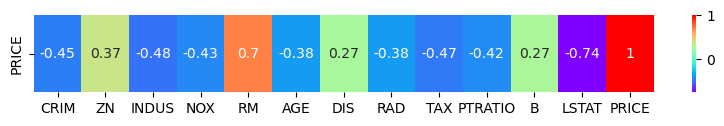

In [296]:
corr_price=df.corr().tail(1).sort_values('PRICE')
plt.figure(figsize=(10,1))
sns.heatmap(corr_price,annot=True, cmap= 'rainbow')

In [300]:
x=df.drop('PRICE',axis=1)
y=df['PRICE']

<AxesSubplot:>

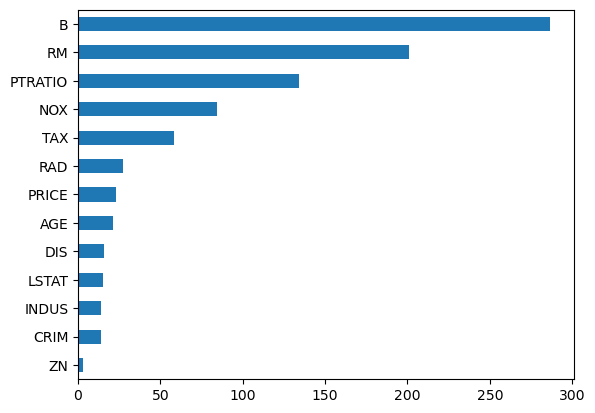

In [302]:
vif_list=[]

for i in range(df.shape[1]):
    vif=variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)
    
    
s1=pd.Series(vif_list,index=df.columns)
s1.sort_values().plot(kind='barh')

# A] Linear Regression

In [304]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=12,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 12)
(127, 12)
(379,)
(127,)


In [306]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [308]:
# Model Evaluation on Testing Data
y_pred=linear_reg.predict(x_test)

mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse_test)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  27.03088312274086
Root Mean Squared Error:  5.19912330328305
Mean Absolute Error: 3.7126435689570774
Test_accuracy: 0.6926132613830929
Adjusted R2 Score: 0.6663323175057263


In [313]:
# Model Evaluation on Training Data
y_pred=linear_reg.predict(x_train)

mse_test=mean_squared_error(y_train,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse_test)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred)
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  24.528616498935293
Root Mean Squared Error:  4.952637327620032
Mean Absolute Error: 3.5226559158336244
Test_accuracy: 0.7031701449788276
Adjusted R2 Score: 0.6953592484890045


### Creating dictonary to save all model results

In [314]:
result_dict = {'train_accuracy':[] , 'test_accuracy':[], 'mse':[]}
index = []

In [315]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("linear_reg")

# B] Ridge Regression

### Hyperparameter Tuning

In [321]:
ridge=Ridge()
paramgrid = {'alpha':np.arange(0.01,30)}

gscv=GridSearchCV(ridge,paramgrid,cv=5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

Ridge(alpha=0.01)

In [322]:
ridge=Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [326]:
# Model Evaluation on Testing Data
y_pred=ridge.predict(x_test)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  27.021948062386635
Root Mean Squared Error:  4.952641981281562
Mean Absolute Error: 3.712146296907429
Test_accuracy: 0.6927148680915811
Adjusted R2 Score: 0.6664455109441298


In [325]:
## Model Evaluation on Training Data

y_pred_train=ridge.predict(x_train)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  24.528662594752554
Root Mean Squared Error:  4.952641981281562
Mean Absolute Error: 3.5220578684471446
Train_accuracy: 0.703169587156304
Adjusted R2 Score: 0.6953586708531125


In [327]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("ridge")

# C] Lasso Regression

### Hyperparameter Tuning

In [329]:
lasso=Lasso()
paramgrid={'alpha':np.arange(0.01,30)}

gscv=GridSearchCV(lasso,paramgrid,cv=5)
gscv.fit(x_train,y_train)
gscv.best_estimator_

Lasso(alpha=0.01)

In [330]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [331]:
# Model Evaluation on Testing Data
y_pred=lasso.predict(x_test)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  26.917239176440876
Root Mean Squared Error:  4.952641981281562
Mean Absolute Error: 3.7091904842436323
Test_accuracy: 0.6939055847547744
Adjusted R2 Score: 0.6677720110864591


In [332]:
# Model Evaluation on Training Data

y_pred_train=lasso.predict(x_train)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  24.56226652411024
Root Mean Squared Error:  4.956033345742362
Mean Absolute Error: 3.5116788249375546
Train_accuracy: 0.7027629335857768
Adjusted R2 Score: 0.6949375733033044


In [333]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("lasso")

# D] KNN_Regressor

#### Feature Scaling

#####  Normalization

In [334]:
normal_scaler=MinMaxScaler()
x_train_array = normal_scaler.fit_transform(x_train)
x_train_n = pd.DataFrame(x_train_array, columns=x_train.columns)

x_test_array = normal_scaler.transform(x_test)
x_test_n = pd.DataFrame(x_test_array, columns=x_test.columns)

In [335]:
knn=KNeighborsRegressor()
knn.fit(x_train_n,y_train)

KNeighborsRegressor()

In [336]:
# Model Evaluation on Testing Data
y_pred=knn.predict(x_test_n)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  19.01315905511811
Root Mean Squared Error:  4.956033345742362
Mean Absolute Error: 3.0456692913385828
Test_accuracy: 0.7837883088680728
Adjusted R2 Score: 0.7679045195284671


In [337]:
## Model Evaluation on Training Data

y_pred_train=knn.predict(x_train_n)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  12.464861213720315
Root Mean Squared Error:  3.530561033847215
Mean Absolute Error: 2.327810026385224
Train_accuracy: 0.8491581069365148
Adjusted R2 Score: 0.8465325752156807


In [339]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("knn_w/o_hp")

# E] KNN with HP

### Hyperparameter Tuning

In [341]:
knn_hp=KNeighborsRegressor()
paramgrid={'n_neighbors':np.arange(3,50), 'p':[1,2], "weights":["uniform","distance"]}

gscv = GridSearchCV(knn_hp, paramgrid, cv=5)
gscv.fit(x_train_n,y_train)
gscv.best_estimator_

KNeighborsRegressor(p=1, weights='distance')

In [342]:
knn_hp=KNeighborsRegressor(n_neighbors=5, p=1, weights='distance')
knn_hp.fit(x_train_n,y_train)

KNeighborsRegressor(p=1, weights='distance')

In [344]:
# Model Evaluation on Testing Data
y_pred=knn_hp.predict(x_test_n)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  15.20528368856611
Root Mean Squared Error:  3.530561033847215
Mean Absolute Error: 2.7706130268196487
Test_accuracy: 0.827090275165998
Adjusted R2 Score: 0.8161444293515943


In [345]:
# Model Evaluation on Training Data

y_pred_train=knn_hp.predict(x_train_n)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  0.0
Root Mean Squared Error:  0.0
Mean Absolute Error: 0.0
Train_accuracy: 1.0
Adjusted R2 Score: 1.0027322404371584


In [346]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("knn with HP")

# F] DecisionTreeRegressor

### Hyperparameter Tuning

In [347]:
dt_reg=DecisionTreeRegressor()
hyperparameter = {'criterion':['mse','mae'],
                 'max_depth':np.arange(3,16),
                 'min_samples_split':np.arange(2,20),
                 'min_samples_split':np.arange(2,15)}
rscv=RandomizedSearchCV(dt_reg, hyperparameter, cv=5)
rscv.fit(x_train,y_train)
rscv.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=11, min_samples_split=10)

In [349]:
dt_reg=DecisionTreeRegressor(criterion='mae', max_depth=11, min_samples_split=10, min_samples_leaf=7)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=11, min_samples_leaf=7,
                      min_samples_split=10)

In [350]:
# Model Evaluation on Testing Data
y_pred=dt_reg.predict(x_test)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)  #with prediction
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  17.165275590551182
Root Mean Squared Error:  0.0
Mean Absolute Error: 2.835433070866142
Test_accuracy: 0.8048018609942877
Adjusted R2 Score: 0.791314353914689


In [351]:
# Model Evaluation on Training Data

y_pred_train=dt_reg.predict(x_train)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)

print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  14.007335092348285
Root Mean Squared Error:  3.7426374513634477
Mean Absolute Error: 1.9350923482849605
Train_accuracy: 0.8304920603705799
Adjusted R2 Score: 0.8272035269957644


In [352]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("DT with HP")

### Pruning

In [353]:
dt_reg_pruning=DecisionTreeRegressor(random_state=12)
dt_reg_pruning.fit(x_train,y_train)

DecisionTreeRegressor(random_state=12)

In [354]:
result=dt_reg_pruning.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list=result["ccp_alphas"]
ccp_alpha_list[332]

0.35942271682688864

In [355]:
train_accuracy_list=[]
test_accuracy_list=[]

for ccp_alpha in ccp_alpha_list:
    dt_reg_alpha=DecisionTreeRegressor(random_state=30,ccp_alpha=ccp_alpha)
    dt_reg_alpha.fit(x_train,y_train)
    train_accuracy_list.append(dt_reg_alpha.score(x_train,y_train))
    test_accuracy_list.append(dt_reg_alpha.score(x_test,y_test))

In [356]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([332], dtype=int64),)

In [357]:
test_accuracy_list[332]

0.8094848444024747

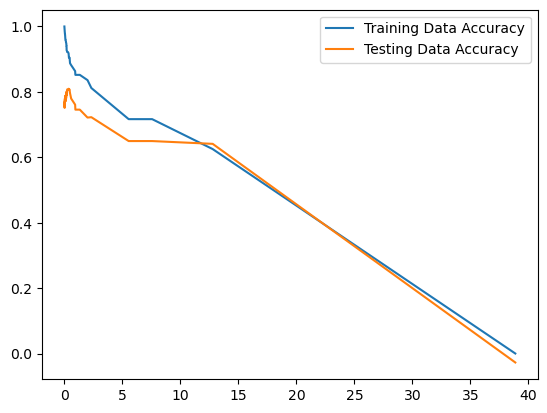

In [358]:
fig,ax=plt.subplots()
ax.plot(ccp_alpha_list,train_accuracy_list,label="Training Data Accuracy")
ax.plot(ccp_alpha_list,test_accuracy_list,label="Testing Data Accuracy")
ax.legend()

### Model Training

In [359]:
dt_reg_pruning=DecisionTreeRegressor(ccp_alpha=ccp_alpha_list[332],random_state=12)
dt_reg_pruning.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.35942271682688864, random_state=12)

In [360]:
# Model Evaluation on Testing Data
y_pred=dt_reg_pruning.predict(x_test)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)  #with prediction
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  17.00713004218241
Root Mean Squared Error:  3.7426374513634477
Mean Absolute Error: 2.8526209411647883
Test_accuracy: 0.8066002426497861
Adjusted R2 Score: 0.7933178141800249


In [361]:
## Model Evaluation on Training Data

y_pred_train=dt_reg_pruning.predict(x_train)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)

print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  7.117687208022013
Root Mean Squared Error:  2.667899399906603
Mean Absolute Error: 2.087724966996286
Train_accuracy: 0.9138662361109957
Adjusted R2 Score: 0.9135390805630256


In [362]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("DT with Pruning")

# E] Bagging

In [363]:
bag=BaggingRegressor()
bag.fit(x_train,y_train)

BaggingRegressor()

In [364]:
# Model Evaluation on Testing Data
y_pred=bag.predict(x_test)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)  #with prediction
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  11.492168503937007
Root Mean Squared Error:  2.667899399906603
Mean Absolute Error: 2.3705511811023623
Test_accuracy: 0.8693146583476128
Adjusted R2 Score: 0.8631838737732178


In [365]:
# Model Evaluation on Training Data

y_pred_train=bag.predict(x_train)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)

print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  2.573673878627968
Root Mean Squared Error:  1.6042673962366647
Mean Absolute Error: 0.9827968337730871
Train_accuracy: 0.9688550210608871
Adjusted R2 Score: 0.9704810190767109


In [366]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("Bagging")

# F] Random Forest 

In [367]:
ran_forest=RandomForestRegressor()
ran_forest.fit(x_train,y_train)

RandomForestRegressor()

In [368]:
# Model Evaluation on Testing Data
y_pred=ran_forest.predict(x_test)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)  #with prediction
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  12.112419858267723
Root Mean Squared Error:  1.6042673962366647
Mean Absolute Error: 2.4340314960629907
Test_accuracy: 0.8622613541671793
Adjusted R2 Score: 0.8553262454318576


In [369]:
## Model Evaluation on Training Data

y_pred_train=ran_forest.predict(x_train)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)

print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  1.4288121583113471
Root Mean Squared Error:  1.1953293095675965
Mean Absolute Error: 0.8246385224274404
Train_accuracy: 0.98270941592558
Adjusted R2 Score: 0.9848275099338657


In [370]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("RF_w/o_HP")

### Hyperparameter Tuning

In [373]:
paramgrid={"n_estimators":np.arange(10,100),
           "criterion":['squared_error',"absolute_error"],
           "max_depth":np.arange(3,8),
           "min_samples_split":np.arange(2,15),
           "min_samples_leaf":np.arange(1,15),
           "max_features":np.arange(1,10)}

rscv_rf=RandomizedSearchCV(ran_forest,paramgrid,cv=5)
rscv_rf.fit(x_train,y_train)
rscv_rf.best_estimator_

RandomForestRegressor(max_depth=4, max_features=5, min_samples_leaf=6,
                      min_samples_split=12, n_estimators=67)

In [374]:
ran_forest_hp = RandomForestRegressor(max_depth=4, max_features=5, min_samples_leaf=6, min_samples_split=12, n_estimators=67)
ran_forest_hp.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, max_features=5, min_samples_leaf=6,
                      min_samples_split=12, n_estimators=67)

In [375]:
# Model Evaluation on Testing Data
y_pred=ran_forest_hp.predict(x_test)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)  #with prediction
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  12.473900698154294
Root Mean Squared Error:  1.1953293095675965
Mean Absolute Error: 2.4906298390294905
Test_accuracy: 0.8581507072474804
Adjusted R2 Score: 0.8507468405300879


In [376]:
# Model Evaluation on Training Data

y_pred_train=ran_forest_hp.predict(x_train)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)

print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  10.927984208227972
Root Mean Squared Error:  3.3057501732931924
Mean Absolute Error: 2.235528002405503
Train_accuracy: 0.867756423671805
Adjusted R2 Score: 0.865791487900585


In [377]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("RF_with_HP1")

# G] ADABoost Regressor

In [378]:
ada_reg=AdaBoostRegressor()
ada_reg.fit(x_train,y_train)

AdaBoostRegressor()

In [379]:
# Model Evaluation on Testing Data
y_pred=ada_reg.predict(x_test)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse_test)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)  #with prediction
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  16.503736207083463
Root Mean Squared Error:  4.062479071587134
Mean Absolute Error: 2.9607932947084836
Test_accuracy: 0.8123246797134329
Adjusted R2 Score: 0.7996950379263682


In [380]:
# Model Evaluation on Training Data

y_pred_train=ada_reg.predict(x_train)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse_test)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)

print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  7.779979294798927
Root Mean Squared Error:  4.062479071587134
Mean Absolute Error: 2.2890736374624576
Train_accuracy: 0.905851594758998
Adjusted R2 Score: 0.9052397661575416


In [381]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("AdaBoost_w/o_HP")

### Hyperparameter Tuning

In [382]:
paramgrid={"n_estimators":np.arange(10,100),"learning_rate":np.arange(0.1,1,0.1),"random_state":[12]}
rscv=RandomizedSearchCV(ada_reg,paramgrid,cv=5)
rscv.fit(x_train,y_train)
rscv.best_estimator_

AdaBoostRegressor(learning_rate=0.9, n_estimators=72, random_state=12)

In [383]:
ada_reg_hp=AdaBoostRegressor(learning_rate=0.9, n_estimators=72, random_state=12)
ada_reg_hp.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.9, n_estimators=72, random_state=12)

In [384]:
# Model Evaluation on Testing Data
y_pred=ada_reg_hp.predict(x_test)


mse_test=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",mse_test)

rmse=np.sqrt(mse_test)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

test_accuracy=r2_score(y_test,y_pred)  #with prediction
print("Test_accuracy:",test_accuracy)

adj_r2=1-(((1-test_accuracy)*(x_test.shape[0])-1))/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  15.05941477387016
Root Mean Squared Error:  3.8806461799383567
Mean Absolute Error: 2.7926426614395847
Test_accuracy: 0.8287490507875852
Adjusted R2 Score: 0.8179923635966958


In [385]:
# Model Evaluation on Training Data

y_pred_train=ada_reg_hp.predict(x_train)


mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)

rmse=np.sqrt(mse_test)
print("Root Mean Squared Error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)

train_accuracy=r2_score(y_train,y_pred_train)
print("Train_accuracy:",train_accuracy)

adj_r2=1-(((1-train_accuracy)*(x_train.shape[0])-1))/(x_train.shape[0]-x_train.shape[1]-1)

print("Adjusted R2 Score:",adj_r2)

Mean Squared Error:  7.368759478935847
Root Mean Squared Error:  3.8806461799383567
Mean Absolute Error: 2.222249071817242
Train_accuracy: 0.9108279177542133
Adjusted R2 Score: 0.9103928437946636


In [386]:
result_dict["train_accuracy"].append(train_accuracy)
result_dict["test_accuracy"].append(test_accuracy)
result_dict["mse"].append(mse_test)
index.append("AdaBoost_with_HP")

## Creating dataframe of results for all models¶

In [387]:
result_df=pd.DataFrame(result_dict,index=index)
final_result=result_df.sort_values("test_accuracy",ascending=False)
final_result

,train_accuracy,test_accuracy,mse
Bagging,0.968855,0.869315,11.492169
RF_w/o_HP,0.982709,0.862261,12.112420
RF_with_HP1,0.867756,0.858151,12.473901
AdaBoost_with_HP,0.910828,0.828749,15.059415
knn with HP,1.000000,0.827090,15.205284
AdaBoost_w/o_HP,0.905852,0.812325,16.503736
DT with Pruning,0.913866,0.806600,17.007130
DT with HP,0.830492,0.804802,17.165276
knn_w/o_hp,0.849158,0.783788,19.013159
knn_w/o_hp,0.849158,0.783788,19.013159


<AxesSubplot:>

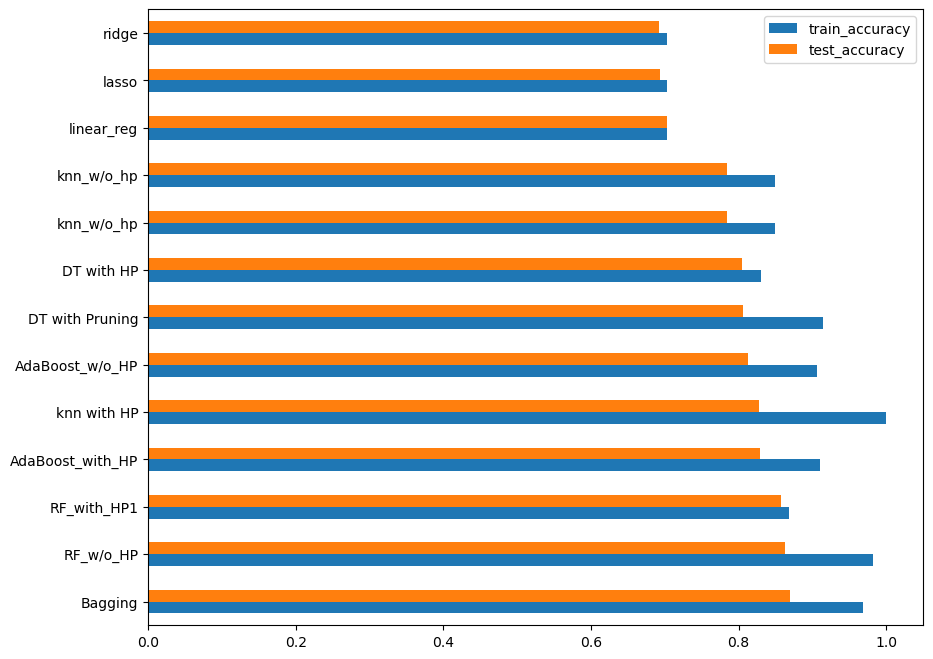

In [388]:
final_result[["train_accuracy","test_accuracy"]].plot(kind="barh",figsize=(10,8))

<AxesSubplot:>

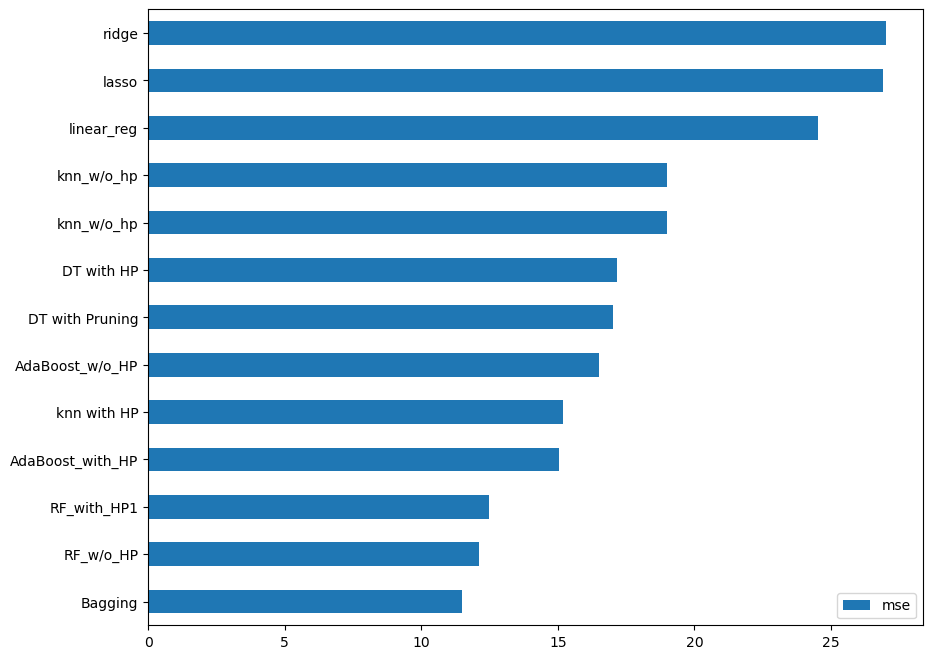

In [389]:
final_result[["mse"]].plot(kind="barh",figsize=(10,8))